<h1 align="center">Customer Segmentation In Bank Customers</h1> 
_____________________________________________________________________________________________________

<h5 align="center">Luis Terán</h5> 

Customer segmentation involves grouping customers into specific marketing groups, perhaps narrowing them down by gender, interests, buying habits or demographic. The process requires a thought-out strategy, understanding how to manage and group your customers and which data you will use to do this. By differentiating their customer base, businesses can better target individuals and maximize sales, link-sell appropriately and provide more tailored shopping experiences. The aim of this project is to identify patterns followed by users, grouping them with other users with the same characteristics and discover which values of every feature identify that group. To be more specific, we will identify user types in credit card holders' data collected over 6 months.

<img src="images/segmentation2.jpg" alt="Figure 1" style="width: 600px;"/><p style="text-align:center;font-size: 11px;">Customer Segmentation</p>

For this project the dataset was obtained from:

</br><center> https://www.kaggle.com/arjunbhasin2013/ccdata </center>

The sample dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables. The variables contained are:

|         Variable Name        | Description |
|:--------------------|:------|
| CUSTID   |   Identification of Credit Card holder (Categorical) |
| BALANCE   |   Balance amount left in their account to make purchases |
| BALANCEFREQUENCY   |   How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated) |
| PURCHASES   |   Amount of purchases made from account |
| ONEOFFPURCHASES   |   Maximum purchase amount done in one go |
| INSTALLMENTSPURCHASES   |   Amount of purchase done in installment |
| CASHADVANCE   |   Cash in advance given by the user |
| PURCHASESFREQUENCY   |   How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased) |
| ONEOFFPURCHASESFREQUENCY   |   How frequently Purchases are happening in one go (1 = frequently purchased, 0 = not frequently purchased) |
| PURCHASESINSTALLMENTSFREQUENCY   |   How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done) |
| CASHADVANCEFREQUENCY   |   How frequently the cash in advance being paid |
| CASHADVANCETRX   |   Number of Transactions made with "Cash in Advanced" |
| PURCHASESTRX   |   Number of purchase transactions made |
| CREDITLIMIT   |   Limit of Credit Card for user |
| PAYMENTS   |   Amount of Payment done by user |
| MINIMUM_PAYMENTS   |   Minimum amount of payments made by user |
| PRCFULLPAYMENT   |   Percent of full payment paid by user |
| TENURE   |   Tenure of credit card service for user |

<p style="text-align:center;font-size: 11px;">Variable description table</p>

The process followed by the project was:
1. Exploratory Data Analysis: Distribution and relation between features are studied. Also, missing values and repeated values are handled.
2. Log Transformation: A logarithmic transformation is performed in order to deal with the skewness present in most of the dataset variables.
3. Cluster Analysis: The correct number of clusters is chosen using the WCSS and Silhouette score
4. Clustering Implementation: The customer segmentation is performed using K-Means algorithm.
5. Final Observations: The different type of users are described and final conclusions are made.

The final type of users found in the dataset were:
- Type 1 (One off buyer): This is a common user type principally characterized by spending a lot of money in one go frequently. 
- Type 2 (Inactive user): They are not frequent users of the bank services.
- Type 3 (Installment buyer): This type of users don't usually buy in one go, they usually have installment spendings instead. 
- Type 4 (Average user): They are completely analogous to type 1 users but they have lower balance and lower credit limit.
- Type 5 (Responsible user): This type of user usually buys a few items rarely, also is characterized for using the payment in advance services frequently.
- Type 6 (New users): These are low tenured users, they haven't done enough purchases in any way yet.
- Type 7 (Highly active user): This is the most active kind of user.

Complete description is available at the Final Observations section

 ## 1. Exploratory Data Analysis



### 1.1 General Analysis

First of all, we need to import the complete dataset and take a view of the data. It is a 18 column dataset with 8905 different customer characteristics that define their behavior. Before proceeding, we need to take care of some aspects of the dataset:
- Missing values: There were identified 313 and 1 missing values for the columns 'MINIMUM_PAYMENTS' and 'CREDIT_LIMIT' respectively. For the 'MINIMUM_PAYMENTS' columns the values were filled with the median value of the columns. On the other hand, the missing value in 'CREDIT_LIMIT' was filled with the mean of the column.
- Duplicates: There were no duplicate observations in the dataset.
- Unnecessary variables: The 'CUST_ID' column it is an exclusive identifier for every user but it doesn't provide any information for the model so it's removed from the dataset.

In [1]:
# All the libraries needed for the project are loaded
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import warnings

np.random.seed(0)
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns', None)

In [2]:
# The dataset is imported
data = pd.read_csv('./data/CC GENERAL.csv')
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
# Showing number of rows (8950) and columns (18)
data.shape

(8950, 18)

In [4]:
# Checking for missing data through columns
temp = data.isnull().sum().to_frame()
temp.columns = ['Missing data points']
temp

,Missing data points
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [5]:
# Filling up the missing elements with median of the 'MINIMUM_PAYMENT' 
data.loc[(data['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].median()

In [6]:
# Handling NaN value from 'CREDIT_LIMIT'
avg = data['CREDIT_LIMIT'].mean()
data['CREDIT_LIMIT'] = data['CREDIT_LIMIT'].fillna(avg)

In [7]:
# Let's see if we have duplicated entries in the data
data.duplicated().sum()

0

In [8]:
# Dropping 'CUST_ID' column
data.drop('CUST_ID', axis=1, inplace=True)

### 1.2 Distribution of the data

For this section, we will study the distribution of the variables. Ideally, the variables should have a Gaussian distribution and for some techniques used in this project there is an assumption of Gaussian distributed data. For this, we will plot a grid of distributions for every variable. The quartiles and average of the data are also helpful for identifying data behavior.

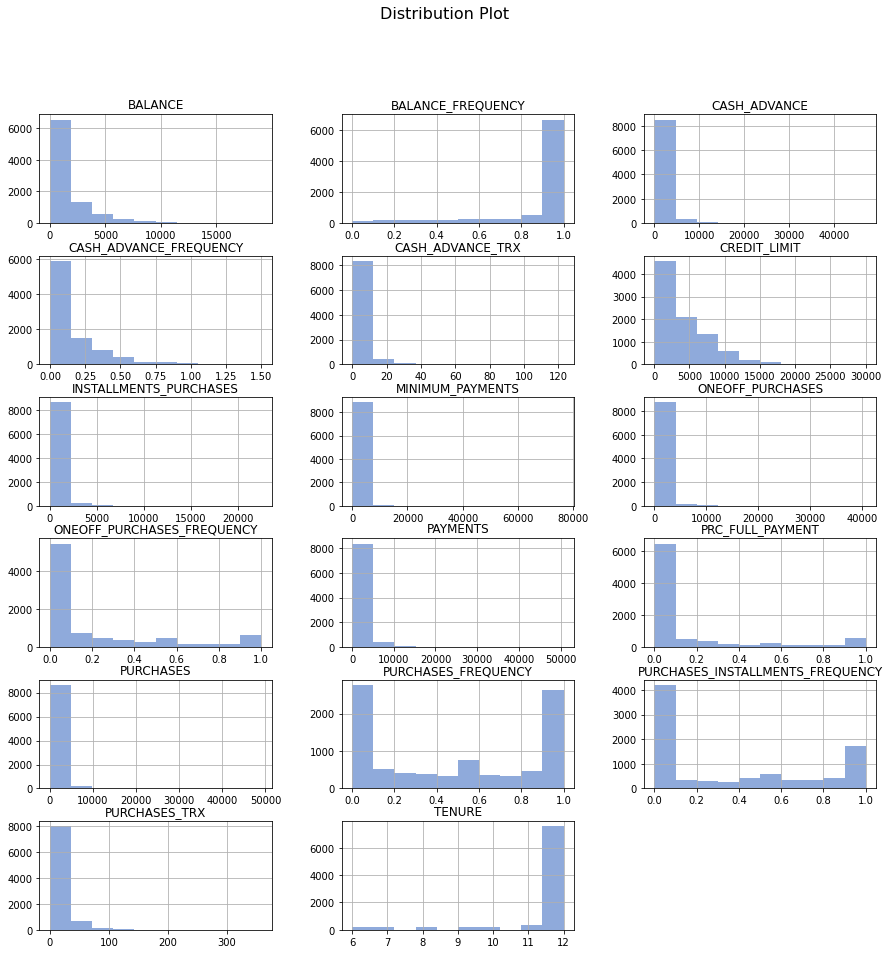

In [9]:
# Distribution plot showing distributop for every behavior variable
import pylab as pl

data.hist(bins=10, figsize=(15, 15), facecolor='#4472C4',alpha=0.6, layout=(6,3))
pl.suptitle("Distribution Plot", size=16)
plt.show()

In [10]:
# Descriptive statistics of the data
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,844.906767,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2332.792322,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


For better understanding consult the variable description table.
Some inferences:
- The average balance amount of users is \\$1,564 but this value is modified by the skewness caused by the highest balance amounts. A better is indicator is the median, that indicates \$873.38 is the most approximate common balance amount among the credit card holders.
- The balance frequency is high for most cases (for more than 75% of the the credit card holders). This means, for this particular set, the users are constantly receiving or spending money.
- The number of purchases, again is affected by the skewness of high values. The normal amount of purchases made by credit card holders is 362 (median).
- The credit card holders usually have bought at max. 38 items in one go (median).
- The credit card holders usually have bought 89 items in installment purchases (median). At least 25% of the users don't buy installment purchases.
- At least 75% of the credit card holders doesn't give any cash in advance
- The purchase frequency is similar to balance frequency but doesn't take into account received money. 25% of the credit card holders has almost no purchase frequency meanwhile other 25% have a considerably high purchase frequency. The 50% remaining range between those two.
- Purchases are not happening in one go.
- Only a 25% of the credit card holders have a purchase installments high frequency.
- Cash in advance is not being paid frequently for almost all credit card holders.
- 75% of the credit card holders have made less than 17 purchase transactions.
- The credit limit for the credit card holders usually range between \\$3,000 and \\$3,600. The maximum credit limi tis \\$30,000 and the minimum credit limit is \$50.
- The most common range of amount of payments is between \\$380 and \$1901
- The percent of full payment paid by the user is near to 0 for the most cases.
- 25% of the users have been credit card holders for less than 12 months, on the other hand 75% have been credit card holders for 12 months.

For most of the variables we can see there is a skew to the right column, but for cases like PURCHASES_FREQUENCY or PURCHASES_INSTALLMENT_FREQUENCY are bimodal distributions, probably another mode can be considered. This is a first indicator of possible user types.

### 1.3 Correlation Matrix

Once we have a first intuition about the data, we can study how does the variable relate to each other, we can do this with the correlation matrix. A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.

<AxesSubplot:>

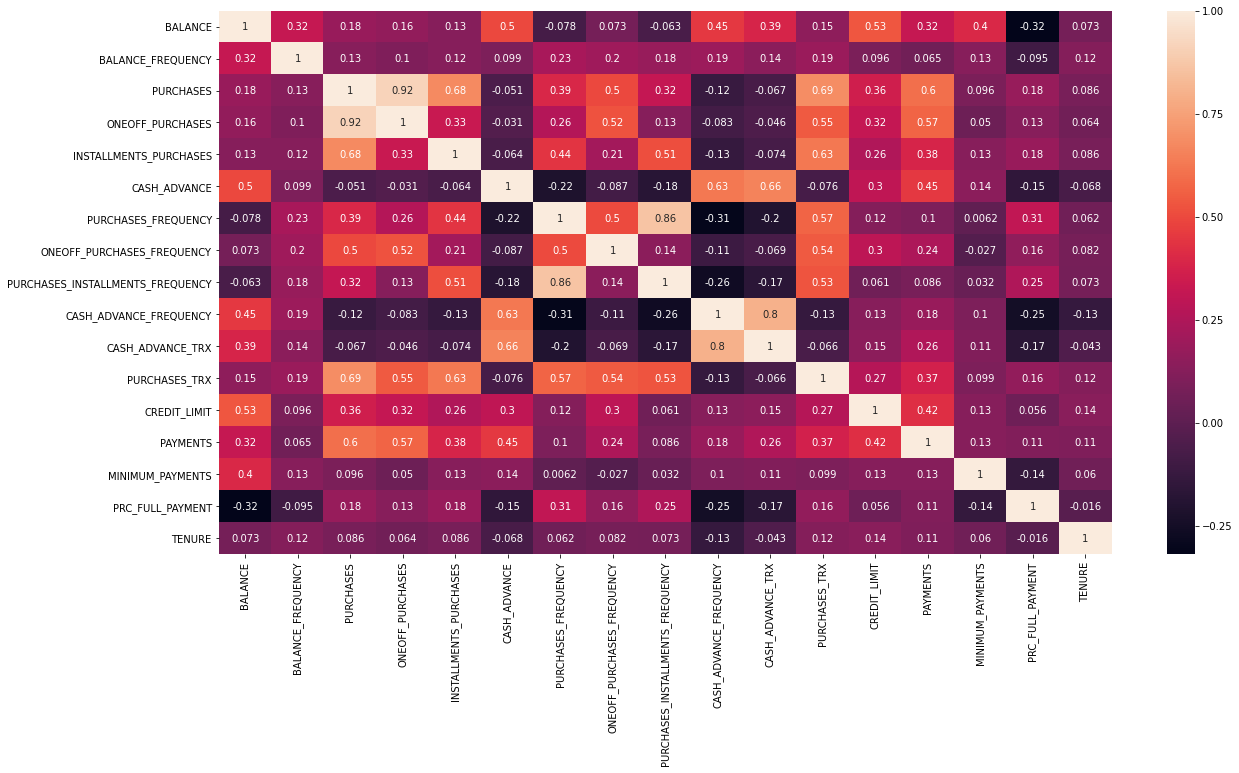

In [11]:
# Correlation Matrix plot
fig, axes = plt.subplots(figsize=(20,10))
sns.heatmap(data.corr(), annot=True)

For simpleness, we will create a table with the top 10 pair of columns with the highest correlation. This table should include the higher positive and negative correlations.

In [12]:
# Top 10 pair of variables with the highest correlation
corr = data.corr()
c1 = corr.abs().unstack()
c1 = c1.sort_values(ascending = False)
c1 = pd.DataFrame(c1)
c1.reset_index(inplace=True)
c1.columns = ['V1', 'V2', 'Abs Corr']
c1 = c1[~(c1['V1']==c1['V2'])]
c1.drop_duplicates(subset='Abs Corr', inplace=True)
c1.head(10)

,V1,V2,Abs Corr
17,PURCHASES,ONEOFF_PURCHASES,0.916845
19,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_FREQUENCY,0.862934
21,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,0.799561
23,PURCHASES,PURCHASES_TRX,0.689561
25,INSTALLMENTS_PURCHASES,PURCHASES,0.679896
27,CASH_ADVANCE_TRX,CASH_ADVANCE,0.656498
29,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,0.628522
31,PURCHASES_TRX,INSTALLMENTS_PURCHASES,0.628108
33,PURCHASES,PAYMENTS,0.603264
35,PURCHASES_TRX,PURCHASES_FREQUENCY,0.568430


From the displayed information above we can state that:
- In general, this is not a highly correlated dataset, for a lot of cases the correlation values are near to 0, being 0 the value for completely not related variables.
- There is not a clear tendency of negatively correlated variables, when two variables are negatively correlated means that as one variable increases its value, the other one decreases. The highest negatively correlated values in the dataset are near to 0.30. A correlation magnitude of 0.3 is not a clear indicator of tendency.
- Considering the not clear tendency, the negatively correlated variables are:
    - Balance - PRC Full Payment: As the percent of full payment paid increases the balance amount decreases.
    - Purchases frequency - Cash Advance frequency: As the purchases are made more frequently, the less frequent the cash in advance is going to get paid.
- The positive correlated values are more common in the dataset with also higher values showing a clearer tendency or relation between them. The positive correlation indicates that when one variable increases, the other one increases too. And when one variable decreases, the other one decreases too.
- The positive correlated variables are:
    - Purchases and One off purchases: As the number of purchases increase, it's more probable to exceed increase the maximum amount spent in purchases in one go.
    - Purchases installments frequency and purchases frequency: When using installment purchases, the purchases frequency increases.
    - Cash advance frequency and cash advance transactions: Naturally, when there are more advance transactions, the cash advance cash advance frequency increases
- There are some variables that are clearly practically not correlated to any variable, this means that the value of those variables is independent and is not affected by other variables. These variables are:
    - Balance frequency
    - Minimum payments
    - Tenure
    - PRC full payment
    - Credit limit (its only related to Balance)

### 1.4 Component by component plot

After we have a better understanding of how the variables are related, we can proceed to look for patterns on the data and how can they be grouped. For that we'll create a component by component plot. For displaying purposes we will need to use a subset of the original dataset, the subset columns were defined as "cont_cols" and they were chosen by their continuous distribution. The discrete distribution columns were left apart.

In [13]:
# Less dicrete variables
cont_cols=['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 
   'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']

Text(0.5, 1.08, 'Component by component plot')

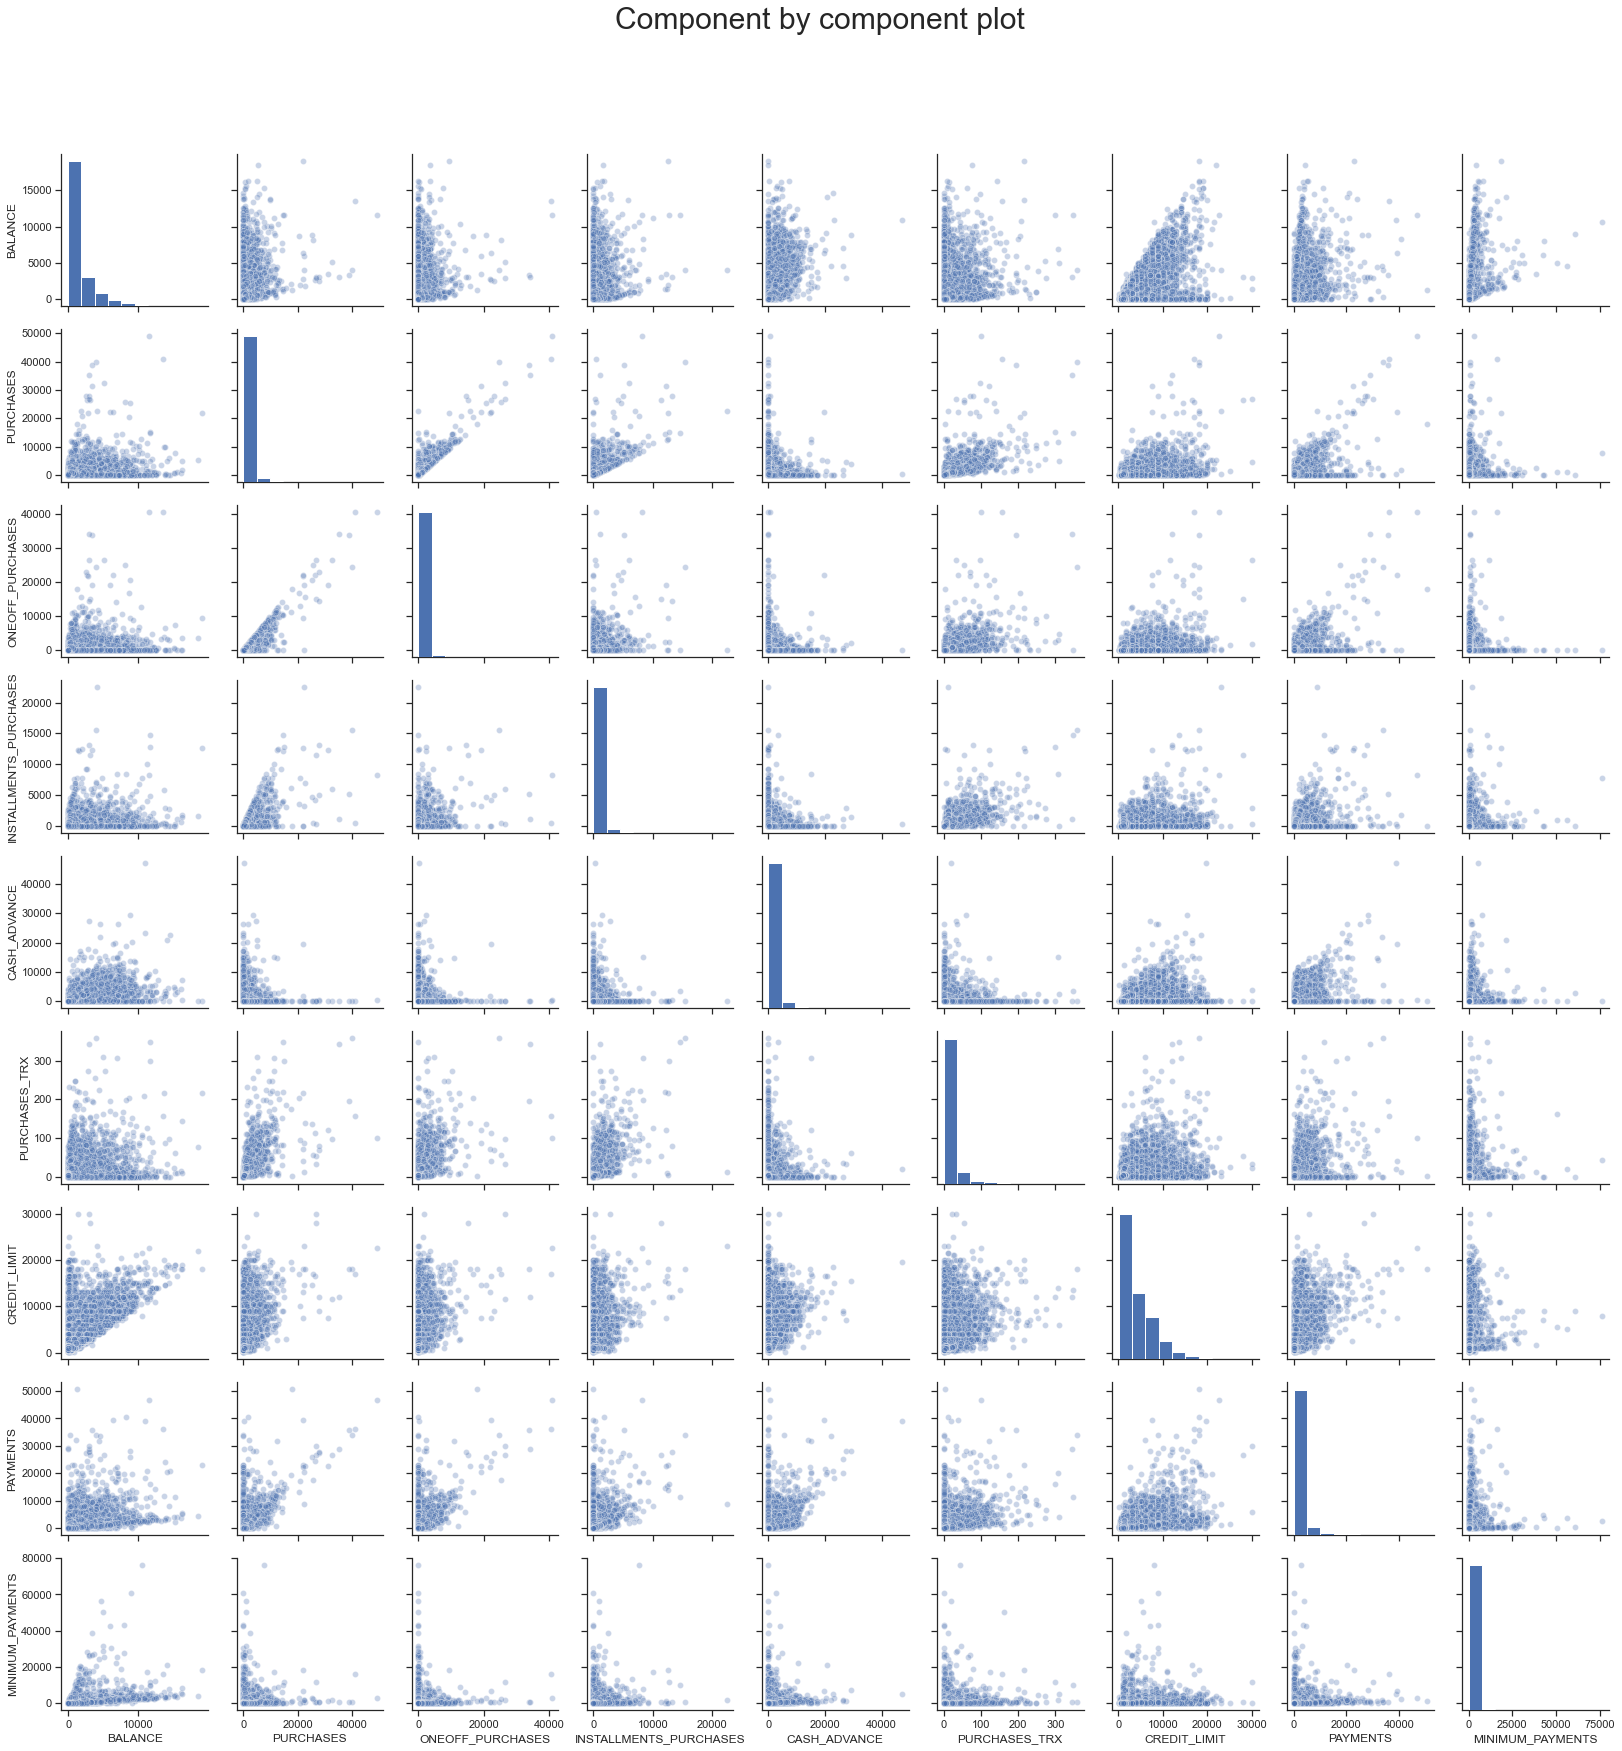

In [14]:
# Component by component plot
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data[cont_cols],  plot_kws={'alpha':0.3})
g.fig.suptitle("Component by component plot", fontsize=30, y=1.08)

### 2. Log Transformation

From the component by component above we can not distinguish a clear view of the data and how they can be grouped. For the most cases we can see that all the values tend to be in the lower left corner of the plots (0,0 corner), this is caused by the distribution of the data, for that reason a log transformation is performed to the data. Also because of the difference of magnitudes, the data is standardized.

In [15]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_log = pd.DataFrame()
for c in [c for c in data.columns if data[c].dtype in numerics]:
    df_log[c] = np.log10(data[c]+1)

In [16]:
# Scaling is made because of the difference of magnitudes

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df_log), columns=df_log.columns)

Text(0.5, 1.08, 'Component by component plot')

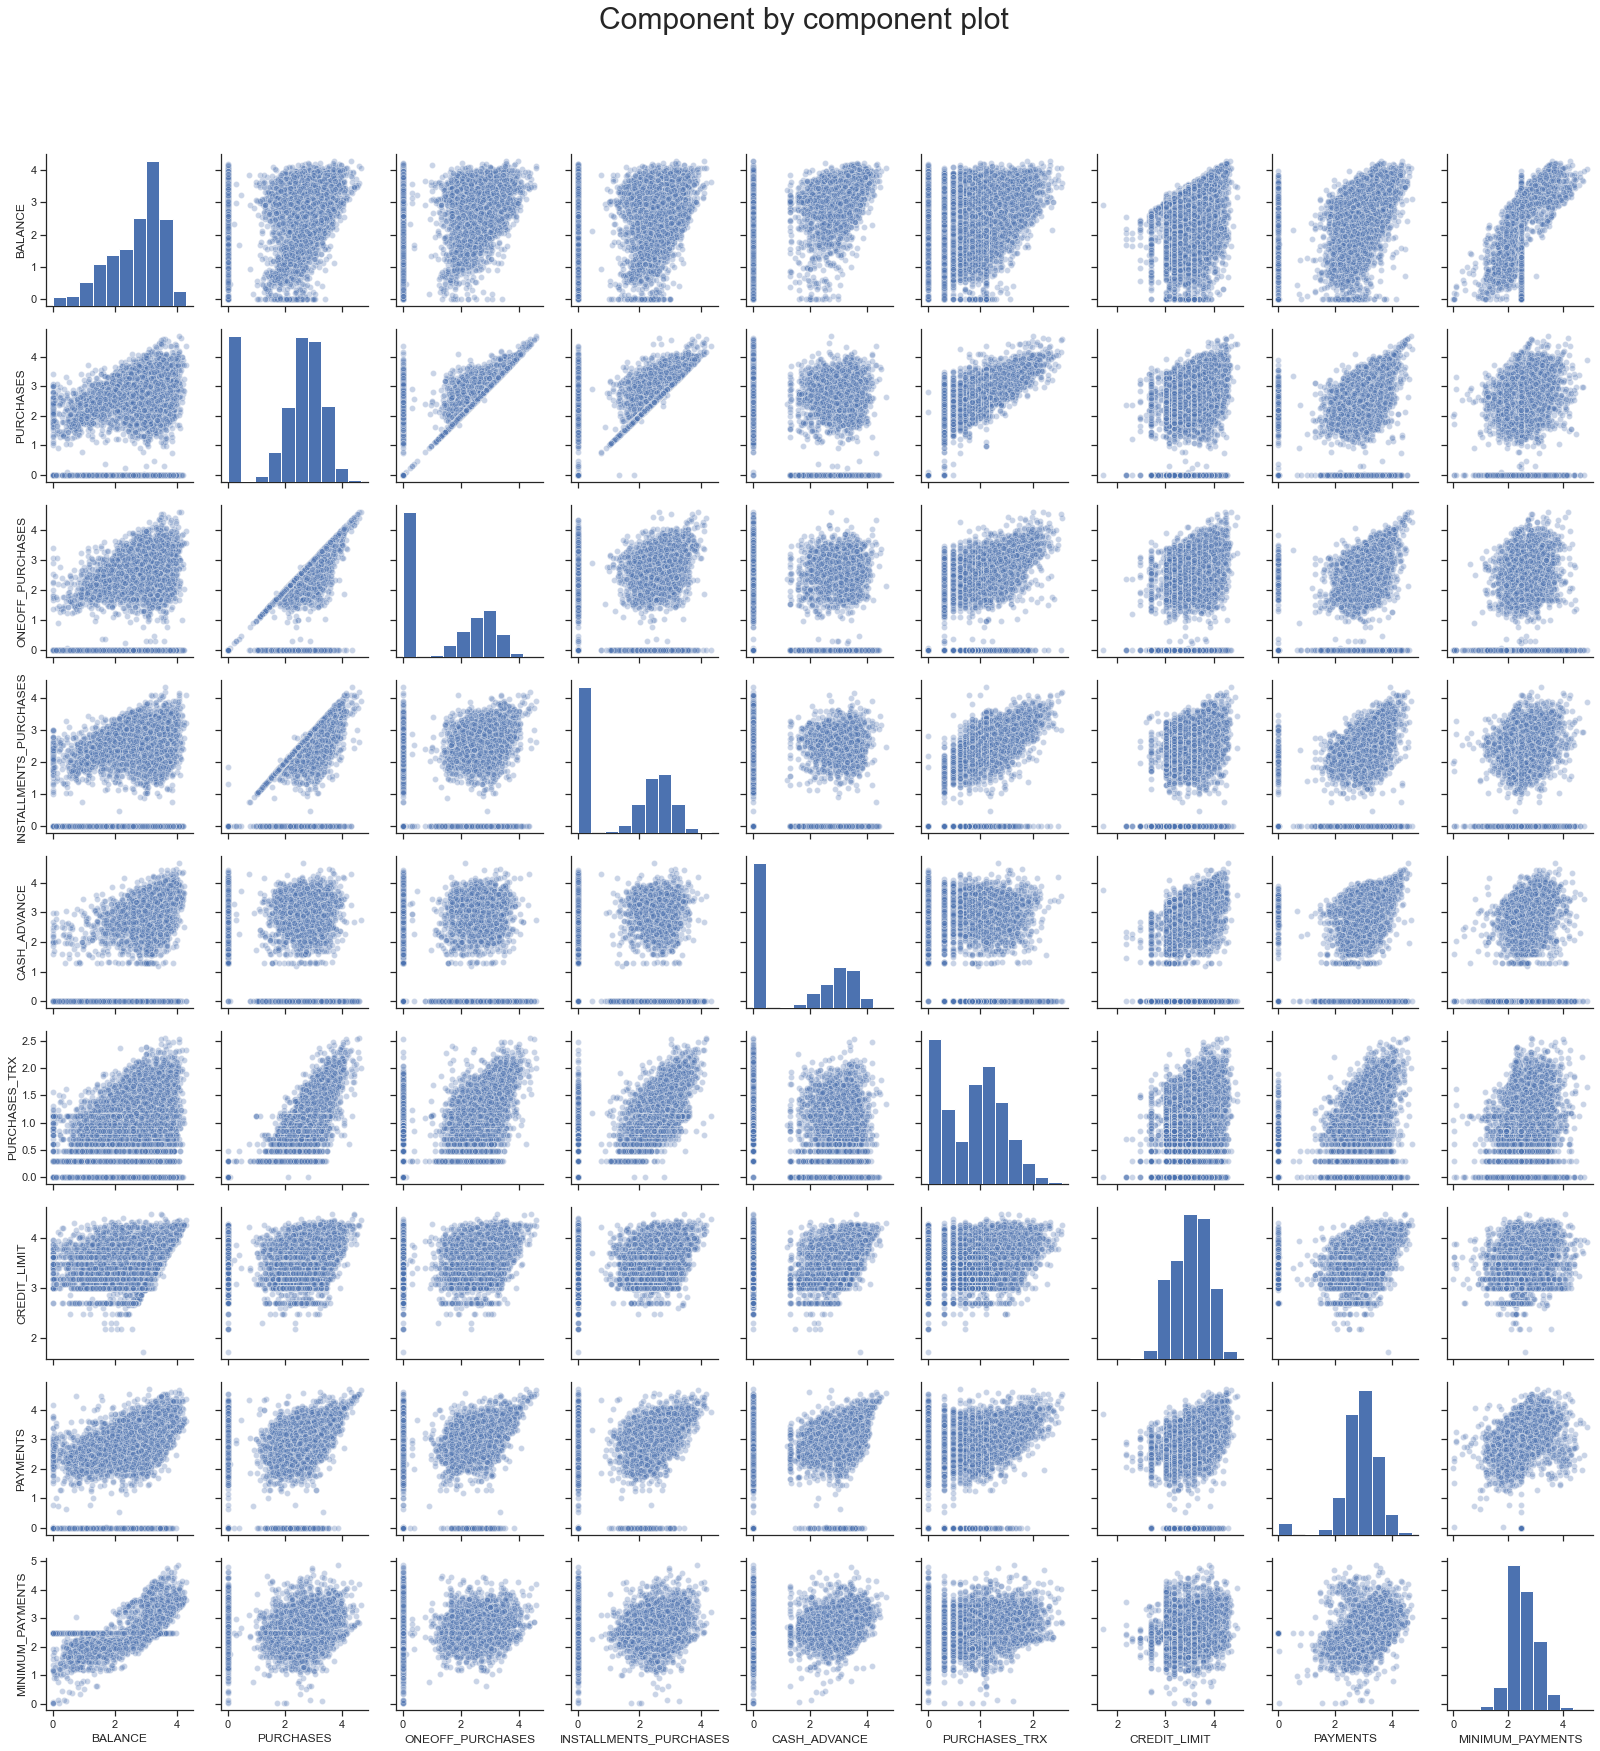

In [17]:
# Component by component plot
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df_log[cont_cols],  plot_kws={'alpha':0.3})
g.fig.suptitle("Component by component plot", fontsize=30, y=1.08)

Now we have a better view of the data but there is no clear segmentation using only two components, thus we will need a bigger dimensional workspace to group the variables. This could also mean that the data is really sticked together and it will be harder to group points. Nevertheless, there could be identified some linear segmentations in the plots. In other words, from a general view, there is a center general distribution with some line agglomerations near to the axis of the plots. This can be related to the diagonal histograms, that in most cases there is a bimodal distribution. This means that indeed there are at least two groups of users.

In [18]:
# Complete component by component plot
# sns.set(style="ticks", color_codes=True)
# g = sns.pairplot(df_log,  plot_kws={'alpha':0.3})
# g.fig.suptitle("Component by component plot", fontsize=18, y=1.08)

## 3. Cluster analysis

Before performing the actual clustering, we will analyze how many clusters there are, in other words, how many user types are present in our dataset. For this project two different techniques were compared and analyzed in order to identify the right number of user types. By the way, there is not a definitive answer of number of clusters, there are multiple right choices according to how specific the user segmentations needs to be. We will try to be as specific as it is reasonable to be, for the number of users' type selection. The implemented techniques were:
- Within clusters sum of squares (Elbow method): This technique measures the squared average distance of all the points within a cluster using the euclidean distance between a given point and the centroid to which it is assigned. As the number of clusters increases, it will always decrease the within sum of squares (WCSS). So we can use an large number of clusters in order to get a low value of WCSS but then the clusters will start to loose sense of what they represent. To determine the optimal number of clusters, we have to select the value of k at the “elbow” i.e. the point after which the distortion/inertia start decreasing in a linear fashion.

<img src="images/elbow2.png" alt="Figure 1" style="width: 600px;"/><p style="text-align:center;font-size: 11px;">Within sum of squares</p>
- Silhouette score: The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b).  To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

<img src="images/sil3.png" alt="Figure 1" style="width: 400px;"/><p style="text-align:center;font-size: 11px;">Silhouette score</p>

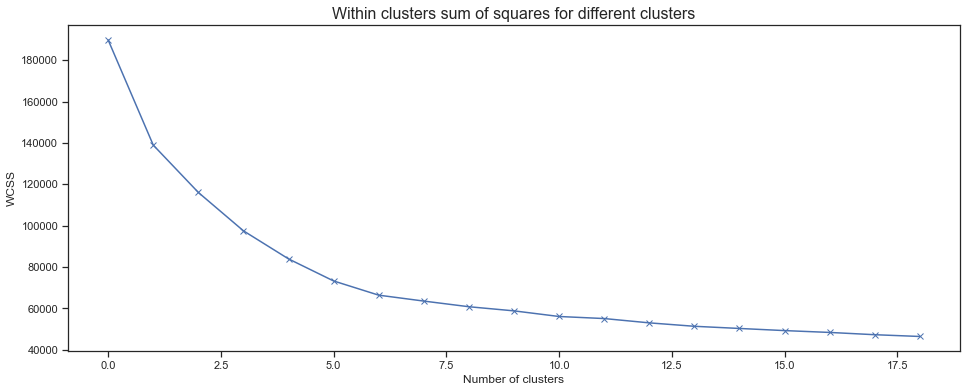

In [49]:
from sklearn.cluster import KMeans

sc = []
range_values = range(1,20)

for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df)
    sc.append(kmeans.inertia_)

plt.figure(figsize = (16,6))
plt.plot(sc, 'bx-')
plt.title('Within clusters sum of squares for different clusters', size=16)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

So as we mentioned before, we need to identify from the "Within clusters sum of squares for different clusters plot" the point after which the distortion/inertia start decreasing in a linear fashion, we can see from the plot that this point corresponds to the point of 6 or 7 number of clusters.

In [41]:
from sklearn.metrics import silhouette_score

range_n_clusters = [3, 4, 5, 6, 7, 8, 9]
sil_avgs = []
for n in range_n_clusters:
    clusterer = KMeans(n_clusters=n, random_state=5)
    cluster_labels = clusterer.fit_predict(df)

    silhouette_avg = silhouette_score(df, cluster_labels, sample_size=500)
    sil_avgs.append(silhouette_avg)
    print("For n_clusters =", n,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 3 The average silhouette_score is : 0.22123601435797383
For n_clusters = 4 The average silhouette_score is : 0.27113027110343285
For n_clusters = 5 The average silhouette_score is : 0.30316834807013626
For n_clusters = 6 The average silhouette_score is : 0.3127969743900726
For n_clusters = 7 The average silhouette_score is : 0.33527918494889336
For n_clusters = 8 The average silhouette_score is : 0.2968358408748508
For n_clusters = 9 The average silhouette_score is : 0.24560181703354805


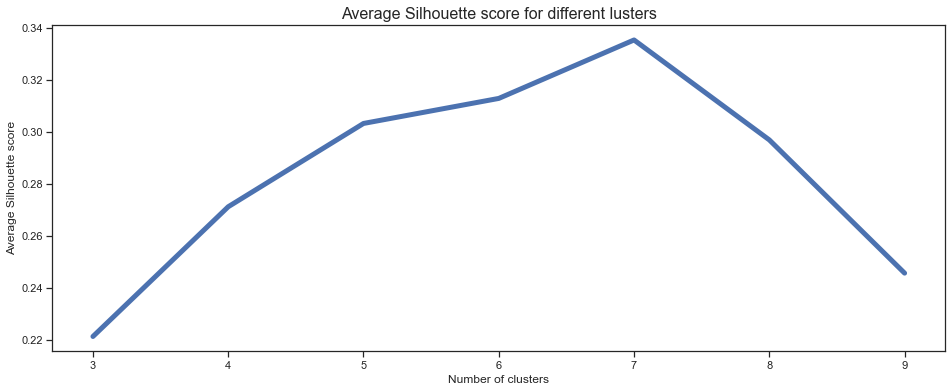

In [48]:
plt.figure(figsize = (16,6))
plt.plot(range_n_clusters,sil_avgs, linewidth=5)
plt.title('Average Silhouette score for different lusters', size=16)
plt.xlabel('Number of clusters')
plt.ylabel('Average Silhouette score')
plt.show()

From the average Silhouette score we detected a clear maximum value at 7 clusters. In comparison with the Within clusters sum of squares technique we realize there are consistent with each other. 
Finally, we conclude that in fact there are 7 different groups in our dataset.

## 4. Cluster implementation

Once we know the actual number of different type of users we have, the next step is to create every group and identify what characteristics can identify them better and what are the most common values in the feature set for that kind of user. Also, we will label all the user from the dataset using this characteristics. The main goal is to identify every user into its corresponding group according to the features or characteristics they have.

<img src="images/segmentation.png" alt="Figure 1" style="width: 600px;"/><p style="text-align:center;font-size: 11px;"></p>

For grouping the user types we implemented the K-Means algorithm. K-Means is one of the most popular "clustering" algorithms. K-means stores $k$ centroids that it uses to define clusters. A point is considered to be in a particular cluster if it is closer to that cluster's centroid than any other centroid.

K-Means finds the best centroids by alternating between 
1. Assigning data points to clusters based on the current centroids 
2. Choosing centroids (points which are the center of a cluster) based on the current assignment of data points to clusters.

In the clustering problem, we are given a training set ${x^{(1)}, ... , x^{(m)}}$, and want to group the data into a few cohesive "clusters." Here, we are given feature vectors for each data point $x^{(i)} \in \mathbb{R}^n$ as usual; but no labels $y^{(i)}$ (making this an unsupervised learning problem). Our goal is to predict $k$ centroids and a label $c^{(i)}$ for each datapoint. The k-means algorithm solves an optimization problem and the function to be optimized (minimized) is the sum of the quadratic distances from each object to its cluster centroid.

<img src="images/kmeans2.png" alt="Figure 1" style="width: 600px;"/><p style="text-align:center;font-size: 11px;">K-Means optimization</p>

In [20]:
# Cluster segmentation with 7 different types

n=7
kmeans = KMeans(n)
kmeans.fit(df)
labels = kmeans.labels_

In [21]:
# Creating a dataframe with the centroid values of every cluster

cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df.columns])

In [22]:
# Saving the labels for every user into the dataframes previously created

data['Group'] = labels
df['Group'] = labels

## 5. Final Observations

In this section we present the final results obtained:
- Type of user count
- Representation of expected values for user types
- Mean characteristic values of every user type
- Median characteristic values of every user type

In [35]:
# Changing the range of label from 0-6 to 1-7
data['Group'] = data['Group'] + 1

In [36]:
# Exact amount of users in every group
data['Group'].value_counts().to_frame()

,Group
5,2083
3,1686
1,1423
4,1271
7,1202
2,843
6,442


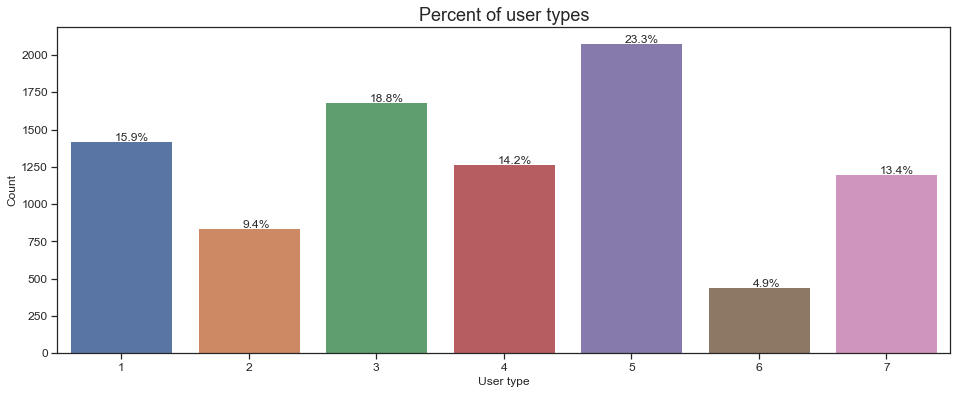

In [46]:
def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

fig = plt.figure(figsize=(16,6))
ax = sns.countplot(x='Group', data=data)
plt.title('Percent of user types', size=18)
plt.xticks(size=12)
plt.xlabel('User type', size=12)
plt.yticks(size=12)
plt.ylabel('Count', size=12)
without_hue(ax, data.Group)

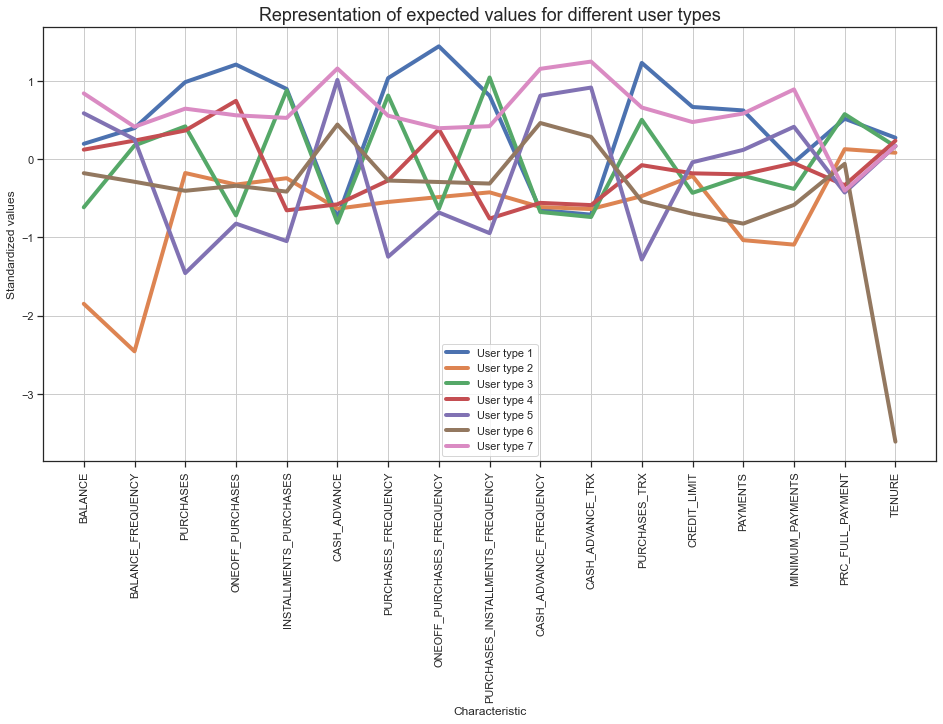

In [47]:
# Representation of expected values for different user types
# It represents whether a variable is high or low for that type of user (with standardized values)

plt.figure(figsize = (16,8))
for i in range(len(cluster_centers)):
    plt.plot(df.columns[:-1],cluster_centers.iloc[i].values, label='User type '+str(i+1), linewidth=4)
plt.title('Representation of expected values for different user types', size=18)
plt.xlabel("Characteristic")
plt.ylabel("Standardized values")
plt.xticks(rotation='vertical')
plt.grid()
plt.legend()
plt.show()

In [24]:
# Mean characteristic values of every type of user
data.groupby('Group').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Group,,,,,,,,,,,,,,,,,
0,1529.690678,0.974031,3391.027400,2213.178299,1177.849100,52.629338,0.918551,0.632956,0.683192,0.012294,0.180604,45.051300,6912.679501,3114.040950,707.384935,0.304857,11.893183
1,31.245488,0.304810,245.054828,136.077817,109.059454,138.592503,0.256321,0.059241,0.188058,0.018756,0.378410,3.753262,3666.413602,719.718088,148.584431,0.192722,11.609727
2,441.541254,0.914571,651.090119,34.645955,617.462295,36.102406,0.813117,0.023233,0.775242,0.008313,0.135231,14.708778,3026.648903,819.316219,672.436378,0.316140,11.729537
3,1125.534489,0.931889,722.144335,676.845523,45.635460,128.842254,0.353136,0.297128,0.063773,0.028023,0.440598,7.036192,3814.144196,1044.346673,647.564407,0.058811,11.830842
4,2375.374553,0.937841,19.359237,17.047758,2.369890,2095.462088,0.016886,0.011856,0.004166,0.286065,6.900144,0.239078,4271.181571,1776.473410,1087.550429,0.031285,11.731157
5,943.550005,0.797043,324.318846,203.610362,120.776357,1277.012860,0.381191,0.115058,0.240515,0.224835,3.556561,4.269231,2451.842646,593.104578,327.436489,0.139173,6.807692
6,3543.271832,0.978669,1453.754110,827.003453,627.017720,2841.312024,0.700540,0.306978,0.522380,0.358862,9.790349,23.505824,6128.535774,3163.358363,1716.450546,0.037460,11.739601


In [25]:
# Median characteristic values of every type of user
data.groupby('Group').median()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Group,,,,,,,,,,,,,,,,,
0,717.764625,1.000000,2331.400,1322.61,739.57,0.000000,1.000000,0.666667,0.750000,0.000000,0,33,6300.0,2043.814652,239.701062,0.083333,12
1,10.954457,0.272727,123.500,0.00,30.90,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,3000.0,268.128456,117.833863,0.000000,12
2,102.119870,1.000000,458.325,0.00,431.40,0.000000,0.916667,0.000000,0.833333,0.000000,0,12,2250.0,548.933799,172.509121,0.142857,12
3,867.728471,1.000000,450.000,400.60,0.00,0.000000,0.272727,0.250000,0.000000,0.000000,0,5,2700.0,615.697560,310.111406,0.000000,12
4,1644.496393,1.000000,0.000,0.00,0.00,1335.303813,0.000000,0.000000,0.000000,0.250000,4,0,3000.0,870.661235,547.238675,0.000000,12
5,577.815457,0.857143,152.305,0.00,0.00,825.410941,0.222222,0.000000,0.000000,0.166667,2,2,1500.0,250.226150,183.658244,0.000000,7
6,2790.631898,1.000000,913.955,406.34,331.99,1897.163378,0.750000,0.250000,0.500000,0.333333,7,14,5500.0,1864.755154,1050.820416,0.000000,12


Finally, we conclude that there are 7 different type of users in the dataset that can be differentiated from each other according to their characteristics, these type of users are:

- Type 1 (One off buyer): This is a common user type (about 16% of the total) principally characterized by spending a lot of money in one go frequently. They used to have a medium-high balance with a high credit limit that allow them to have this lifestyle. They usually don't use any cash in advance option.
- Type 2 (Inactive user): One of the least common group (about 10%). They are not frequent users of the bank services, they usually have low balances, low credit limit and buy using the bank services just a few times even though they have been clients for a while.
- Type 3 (Installment buyer): This represents a really common active user type (about 19%). This type of users uses a lot the bank services similarly to the Type 1 users but with lower balance and lower credit limit. Another important aspect is that they don't usually buy in one go, they usually have installment spendings instead. They usually don't use any cash in advance option.
- Type 4 (Average user): This is an average type of users, represents about the 14% of the total. They are completely analogous to type 1 users, the most important differences are that they have lower balance and lower credit limit, hence lower amount of purchases done and lower frequency. But the main difference is that type 1 users tend to have a high percent of full payment paid meanwhile this type of users have lower values.
- Type 5 (Responsible user): This is the most common user type (about 23% of the total). This type of user usually buys a few items rarely, also is characterized for using the payment in advance services frequently.
- Type 6 (New users): This is the least common user type (about 5% of the total). These are low tenured users, they haven't done enough purchases in any way yet, they have low credit limit and low payments. One important fact is that new users tend to pay in advance meanwhile users with longer tenure don't.
- Type 7 (Highly active user): This user represents about 13% of the total. This is the most active kind of user, they have the highest balance among all types, they make a lot of transactions, purchases and payments. They are also the most active users in all kinds of advance payments.